In [2]:
# PREDICTIVE MAINTENANCE ANALYTICS - Predicting The Useful Life of An Aircraft Engine

# This experiment aims to build a classification model for predicting imminent failure 
# of a machine (in this case, an engine). 
# An attempt will also be made to build a regression model for predicting the RUL 
# (Remaining Useful Life) of the engine.
# The data was generated using C-MAPSS, the commercial version of MAPSS
# (Modular Aero-Propulsion System Simulation) software. This software provides a 
# flexible turbofan engine simulation environment to conveniently simulate the health,
# control and engine parameters.
#
# This dataset is the train.txt in the original competition datasets. It consists of 
# multiple multivariate time series with "cycle" as the unit, together with 21 sensor readings
# for each cycle. Each time series can be considered from a different engine of the same type.
# Each engine is assumed to start with different degrees of initial wear and manufacturing 
# variation, and this information is unknown to the user. In this simulated data, the engine 
# is assumed operating normally at the start of each time series. It starts to degrade at 
# some point during the series of the operating cycles. The degradation progresses and grows 
# in magnitude. When a predefined threshold is reached it is regarded that the engine is not
# safe to be operated any more. In other words, the last cycle in each time series can be 
# considered as the failure point of the corresponding engine.


# The data set was obtained from the NASA Ames Prognostics Data Repository, 
# NASA Ames Research Center, Moffett Field, CA 
# (http://ti.arc.nasa.gov/tech/dash/pcoe/prognostic-data-repository) 



# DATA PROCESSING
### The data set came in 12 different files so we will define a function
### to combine the different sets
import pandas as pd
import numpy as np

df_train = pd.read_csv('./train_FD001.txt', sep='\s+', header=None)
df_test = pd.read_csv('./test_FD001.txt', sep='\s+', header=None)
df_RUL = pd.read_csv('./RUL_FD001.txt', header=None)

df_train.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1',\
                     's2', 's3', 's4', 's5', 's6', 's7', 's8','s9', 's10', 's11',\
                     's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
df_test.columns = df_train.columns


In [3]:
def transform_data(df_train, df_test, df_RUL):
    X_train = df_train.iloc[:,0:].values
    X_test = df_test.iloc[:,0:].values
    RUL = df_RUL.values
    len_dftrain = (len(df_train))-1
    len_dftest = (len(df_test))-1
    fail = []
    lista = []
    for i, _ in enumerate(X_train[:,0]):
        if i == len_dftrain:
            break
        else:
            if X_train[i,0] != X_train[i+1,0]:
                fail.append(X_train[i, 1])

    fail_test = []
    cota_inf = []

    for i, _ in enumerate(X_test[:,0]):
        if i == len_dftest:
            break
        else:
            if X_test[i,0] != X_test[i+1,0]:
                _dummy = X_test[i, 1] + int(RUL[_-1])
                cota_inf.append(X_test[i, 1])
                fail_test.append(_dummy)
 
    lista = []
    for i, j in enumerate(fail):
        lista.append(list(reversed(range(0, int(j),1))))
    RUL_train = np.asarray(sum(lista, []))

    RUL_class_train = []
    for i in RUL_train:
        if i <= 30:
            RUL_class_train.append(1)
        else:
            RUL_class_train.append(0)

    Y_train = np.asarray(RUL_class_train)

    lista = []
    RUL_test = []
    for j, i in zip(fail_test, cota_inf):
        lista.append(list(reversed(range(int(j-i), int(j),1))))
    RUL_test = np.asarray(sum(lista, []))

    RUL_class_test = []
    for i in RUL_test:
        if i <= 30:
            RUL_class_test.append(1)
        else:
            RUL_class_test.append(0)

    Y_test = np.asarray(RUL_class_test)
     
    # Target variables
    # Regression
    df_train['Y_Reg'] = pd.DataFrame(RUL_train)
    df_test['Y_Reg'] = pd.DataFrame(RUL_test)
    
    # Classification
    df_train['Y_Class'] = pd.DataFrame(RUL_class_train)
    df_test['Y_Class'] = pd.DataFrame(RUL_class_test)       
    
    

In [4]:
# Transform first data set
transform_data(df_train, df_test, df_RUL)
df_train1 = df_train
df_test1 = df_test

C:\Anaconda2\envs\python2\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [5]:
# Transform second data set
df_train = pd.read_csv('./train_FD002.txt', sep='\s+', header=None)
df_test = pd.read_csv('./test_FD002.txt', sep='\s+', header=None)
df_RUL = pd.read_csv('./RUL_FD002.txt', header=None)

df_train.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1',\
                     's2', 's3', 's4', 's5', 's6', 's7', 's8','s9', 's10', 's11',\
                     's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
df_test.columns = df_train.columns

transform_data(df_train, df_test, df_RUL)
df_train2 = df_train
df_test2 = df_test

C:\Anaconda2\envs\python2\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [6]:
# Transform third data set
df_train = pd.read_csv('./train_FD003.txt', sep='\s+', header=None)
df_test = pd.read_csv('./test_FD003.txt', sep='\s+', header=None)
df_RUL = pd.read_csv('./RUL_FD003.txt', header=None)

df_train.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1',\
                     's2', 's3', 's4', 's5', 's6', 's7', 's8','s9', 's10', 's11',\
                     's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
df_test.columns = df_train.columns

transform_data(df_train, df_test, df_RUL)
df_train3 = df_train
df_test3 = df_test

C:\Anaconda2\envs\python2\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [7]:
# Transform fourth data set
df_train = pd.read_csv('./train_FD004.txt', sep='\s+', header=None)
df_test = pd.read_csv('./test_FD004.txt', sep='\s+', header=None)
df_RUL = pd.read_csv('./RUL_FD004.txt', header=None)

df_train.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1',\
                     's2', 's3', 's4', 's5', 's6', 's7', 's8','s9', 's10', 's11',\
                     's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
df_test.columns = df_train.columns

transform_data(df_train, df_test, df_RUL)
df_train4 = df_train
df_test4 = df_test

C:\Anaconda2\envs\python2\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [8]:
# Combine train data
trn_frames = [df_train1, df_train2, df_train3, df_train4]
df_train = pd.concat(trn_frames)
df_train = df_train.dropna(subset = ['Y_Reg', 'Y_Class'])

# Combine test data
tst_frames = [df_test1, df_test2, df_test3, df_test4]
df_test = pd.concat(tst_frames)
df_test = df_train.dropna(subset = ['Y_Reg', 'Y_Class'])

In [9]:
# Combine train and test sets to perform exploratory analysis and reshuffle.
df_frames = [df_train, df_test]
df = pd.concat(df_frames)
# Reshuffle rows and reset index
df = df.sample(frac=1).reset_index(drop=True)
df_X = df.ix[:,1:26]
df_Yclass = df['Y_Class']
df_Yreg = df['Y_Reg']

In [10]:
# EXPLORATORY ANALYSIS

import matplotlib.pyplot as plt

In [11]:
df.head(5)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,Y_Reg,Y_Class
0,1,293,41.9988,0.8413,100.0,445.00,549.56,1359.68,1125.63,3.91,...,8116.44,9.1900,0.02,332,2212,100.0,10.76,6.4783,28.0,1.0
1,28,121,0.0019,0.0003,100.0,518.67,642.50,1586.48,1405.34,14.62,...,8133.07,8.4414,0.03,392,2388,100.0,39.18,23.4266,81.0,0.0
2,223,212,9.9995,0.2500,100.0,489.05,605.11,1507.87,1331.21,10.52,...,8191.04,8.7451,0.03,372,2319,100.0,28.30,16.9159,6.0,1.0
3,1,61,0.0004,0.0005,100.0,518.67,642.10,1583.55,1405.52,14.62,...,8131.66,8.4264,0.03,391,2388,100.0,38.89,23.3638,131.0,0.0
4,109,57,35.0017,0.8418,100.0,449.44,555.34,1353.65,1128.53,5.48,...,8064.05,9.2666,0.02,333,2223,100.0,14.86,8.8897,268.0,0.0


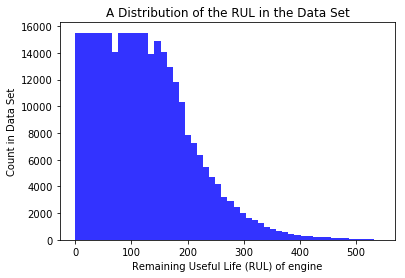

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
numBins = 50
ax.hist(df.Y_Reg, numBins,color='blue',alpha=0.8)
plt.title('A Distribution of the RUL in the Data Set')
plt.xlabel('Remaining Useful Life (RUL) of engine')
plt.ylabel('Count in Data Set')
plt.show()

In [13]:
# It appears that the Remaining Useful Life (RUL) in the data set has a
# positively-skewed distribution.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

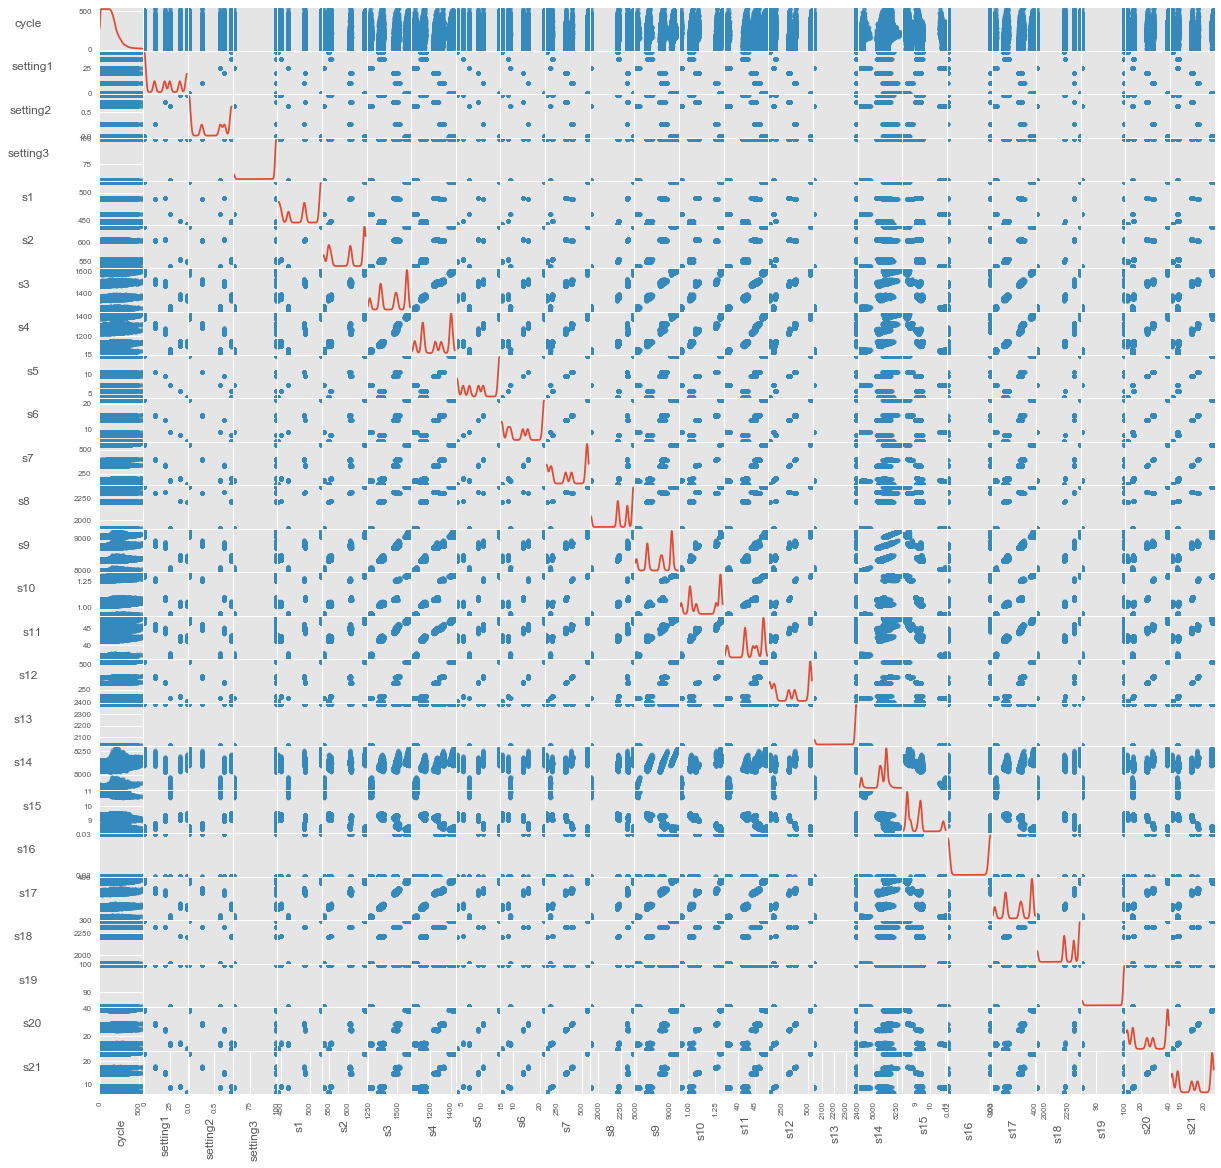

In [86]:
# Produce a scatter matrix for each pair of features in the data
#colors=['red','green']
import matplotlib
matplotlib.style.use('ggplot')
cols = [col for col in df_X.columns]
axs = pd.scatter_matrix(df[cols], alpha = 0.3, 
                  figsize = (20,20), 
                  diagonal = 'kde', 
#                  marker='x', 
#                  c=train.Response.apply(lambda x:colors[x]),
)
n = len(cols)
for df_X in range(n):
    for df_Yreg in range(n):
        # to get the axis of subplots    
        ax = axs[df_X, df_Yreg]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

In [15]:
# DATA PARTITION
# Split the data into 75% train / cross-val and 25% test sets. 

import sklearn
from sklearn.model_selection import train_test_split
X = df.ix[:,1:26]
y = df['Y_Class']
# Use class target, rather than regression target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [16]:
# PRELIMINARY PREDICTIVE ANALYSIS

In [17]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.fit_transform(X_test)

# Remove variables with zero variance
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_sel_train = selector.fit_transform(X_train)
X_sel_test = selector.fit_transform(X_test)

In [53]:
#K NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(X_train_norm, y_train)
y_pred_test = knn.predict(X_test_norm)
y_pred_train = knn.predict(X_train_norm)
acc = accuracy_score(y_pred_test, y_test)
acc2 = accuracy_score(y_pred_train, y_train)

print('Train Accuracy %.4f' % acc2)
print('Test Accuracy %.4f' % acc)
# Performing 10-fold cross-validation
scores = cross_val_score(estimator=knn, X=X_train_norm, y=y_train, cv=10, scoring='roc_auc')
print('ROC AUC: %0.3f +/- %0.3f' % (scores.mean(), scores.std()))

Train Accuracy 0.9701
Test Accuracy 0.9651
ROC AUC: 0.987 +/- 0.002


In [56]:
# k-NN MODEL EVALUATION - CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm
# From the confusion matrix;
# 67590 were correctly classified as successful cycles
# 9345 were correctly classified as failures. 
# However, there were 1136 machine failures that were not correctly predicted.
# Therefore, although the test accuracy is 96.5%, obviously this is not good enough.
# In the future, I may have to increase the penalty for 'false negative' predictions 
# where machine failures are not identified; so as to improve the model.

array([[67590,  1136],
       [ 1647,  9345]])

In [60]:
from sklearn.learning_curve import validation_curve
param_range=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
train_scores, test_scores = validation_curve(estimator=knn, X=X_train_norm, y=y_train,
                                             param_name='n_neighbors', param_range=param_range, cv=5)
train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)
%matplotlib inline
plt.plot(param_range, train_mean, label='training accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean +train_std, color='green', alpha=0.5)
plt.plot(param_range, test_mean, label='validation accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean +test_std, color='cyan', alpha=0.5)
plt.title('Parameter Tuning: Cross-Validation Curve')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('number_of_neighbors')
plt.ylabel('CV Accuracy')
plt.show()

KeyboardInterrupt: 

In [44]:

#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=10, class_weight='balanced')
log_reg.fit(X_train_norm, y_train)
print('Train accuracy: %.3f' % (log_reg.score(X_train_norm, y_train)))
print('Test accuracy: %.3f' % (log_reg.score(X_test_norm, y_test)))
y_pred_test = log_reg.predict(X_test_norm)
scores = cross_val_score(estimator=log_reg, X=X_train_norm, y=y_train, cv=10, scoring='roc_auc')
print('ROC AUC: %0.3f +/- %0.3f' % (scores.mean(), scores.std()))

C:\Anaconda2\envs\python2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy: 0.931
Test accuracy: 0.932


IndexError: too many indices for array

In [33]:
from sklearn.learning_curve import validation_curve
param_range=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_scores, test_scores = validation_curve(estimator=log_reg, X=X_train_norm, y=y_train,
                                             param_name='C', param_range=param_range, cv=5)
train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)
%matplotlib inline
plt.plot(param_range, train_mean, label='Training accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean +train_std, color='cyan', alpha=0.5)
plt.plot(param_range, test_mean, label='validation accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean +test_std, color='blue', alpha=0.5)
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('C')
plt.ylabel('CV Accuracy')
plt.xscale('log')
plt.show()